# Imports and Data Loading

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("../../../data/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Univariate EDA
- price heavily right-skewed, some severe outliers -> log it!
- neighborhood is high-cardinality with many rare categories
- minimum_nights is heavily right-skewed + outliers
- missing values for non-reviewd ABs, few (<=21 missing values for name or host_name)
- most hosts have 1-2 listings, some outliers have hundreds of listings

/home/moritz/mambaforge/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


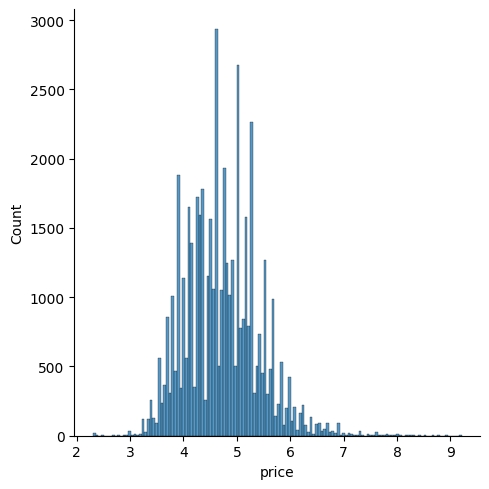

In [10]:
sns.displot(data=df, x=np.log(df["price"]))

In [11]:
df["neighbourhood_group"].value_counts().sort_values()

Staten Island      373
Bronx             1091
Queens            5666
Brooklyn         20104
Manhattan        21661
Name: neighbourhood_group, dtype: int64

In [15]:
df["neighbourhood"].value_counts().sort_values()

Willowbrook              1
Woodrow                  1
Fort Wadsworth           1
Rossville                1
New Dorp                 1
                      ... 
Upper West Side       1971
Bushwick              2465
Harlem                2658
Bedford-Stuyvesant    3714
Williamsburg          3920
Name: neighbourhood, Length: 221, dtype: int64

In [16]:
df["room_type"].value_counts().sort_values()

Shared room         1160
Private room       22326
Entire home/apt    25409
Name: room_type, dtype: int64

45.0


(0.0, 100.0)

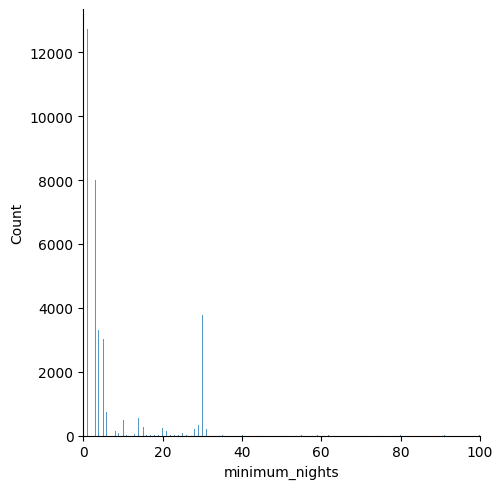

In [21]:
sns.displot(data=df, x="minimum_nights", kind="hist")
print(np.quantile(df["minimum_nights"], 0.99))
plt.xlim(0, 100)

In [24]:
q1, q2 = np.quantile(df["minimum_nights"], [0.25, 0.75])
iqr = q2 - q1
print(iqr)
print(np.median(df["minimum_nights"]) + 3 * iqr)
print((df["minimum_nights"] > 15).mean())

4.0
15.0
0.11496062992125984


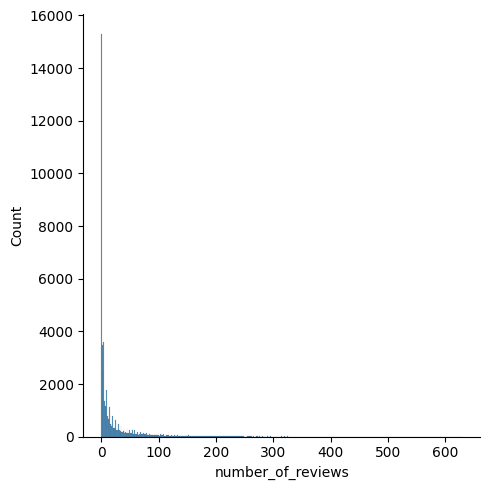

In [25]:
sns.displot(data=df, x="number_of_reviews", kind="hist")

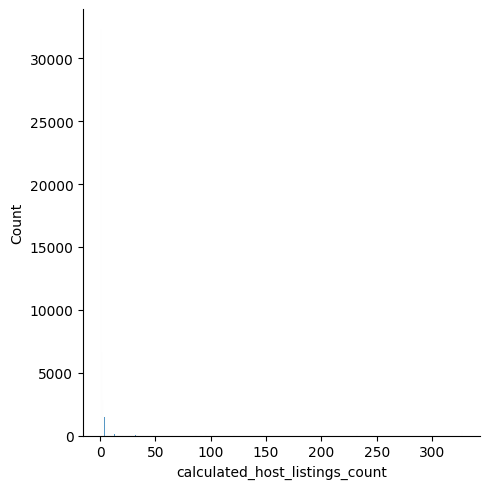

In [27]:
sns.displot(data=df, x="calculated_host_listings_count", kind="hist")

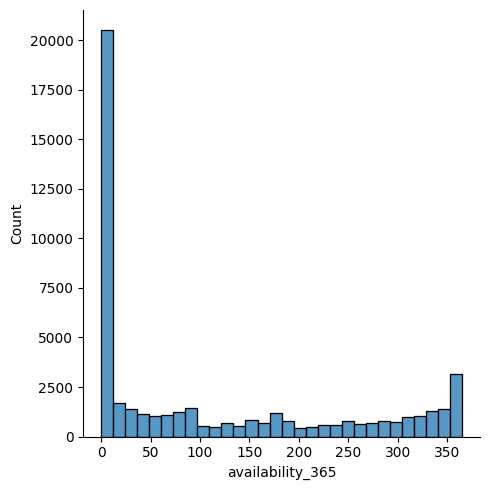

In [31]:
sns.displot(data=df, x="availability_365", kind="hist")


# Missingness

In [26]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Bivariate EDA

<AxesSubplot: xlabel='room_type', ylabel='price'>

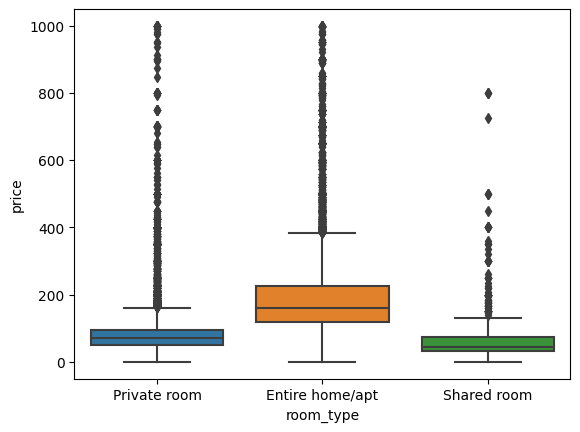

In [36]:
sns.boxplot(data=df.query("price < 1000"), x="room_type", y="price")

<AxesSubplot: xlabel='availability_365', ylabel='price'>

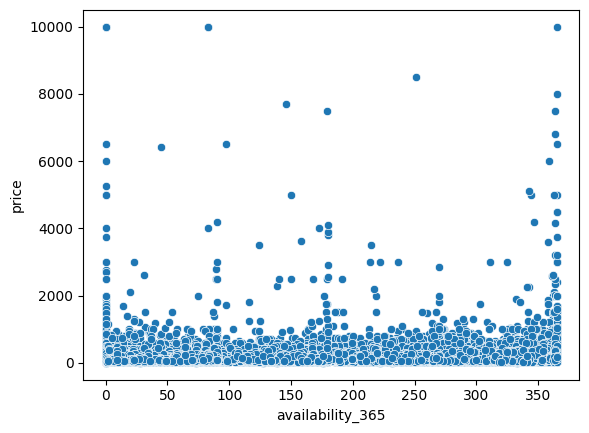

In [37]:
sns.scatterplot(data=df, x="availability_365", y="price")